In [1]:
import cv2

cam = cv2.VideoCapture(0) # VideoCpature(0) grabs the default camera

cv2.namedWindow("test")

img_counter = 0 # to count the number of images being captured when Space is clicked

while True:
    ret, frame = cam.read() #tuple unpacking , frame variable gets the camera input
    if not ret:
        print("failed to grab frame")
        break
    cv2.imshow("test", frame)

    k = cv2.waitKey(1)
    if k%256 == 27:    #if user has waited atleast 1ms(frame time) and pressed Esc key(=27), we can stop the infinite running code
        # ESC pressed
        print("Escape hit, closing window...") #to check code
        break
    elif k%256 == 32:
        # SPACE pressed so image captured and saved 
        img_name = "opencv_digit_{}.png".format(img_counter) # image to be saved as this named file
        cv2.imwrite(img_name, frame)   # save frame variable image 
        print("{} saved".format(img_name)) #to check code
        img_counter += 1 # count the number of times user presses space to capture image

cam.release()

cv2.destroyAllWindows()

opencv_digit_0.png saved
Escape hit, closing window...


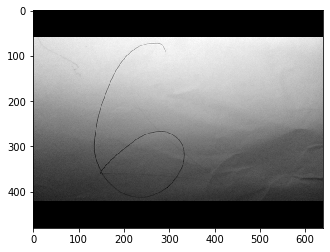

In [2]:
# reading saved image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
img=cv2.imread('opencv_frame_0.png',cv2.IMREAD_GRAYSCALE)
#read image in grayscale to apply thresholding
plt.imshow(img,cmap='gray')

In [3]:
img

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [4]:
img.ndim

2

In [5]:
img.size

307200

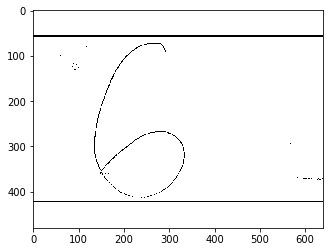

In [6]:
# image preprocessing -- image thresholding 
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,13,7)
new_img=th2
plt.imshow(new_img,cmap='gray')

In [7]:
new_img=np.asarray(new_img)

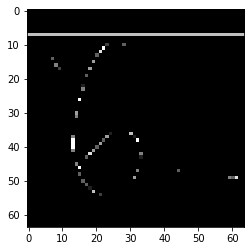

In [8]:
resized_img = cv2.resize(new_img, (64,64))
resized_img=np.asarray(resized_img)
resized_img = resized_img.astype('float32')
resized_img = resized_img.reshape(64,64)
resized_img = 16-resized_img #image inversion
#resized_img /= 16
plt.imshow(resized_img,cmap='gray')

In [9]:
resized_img.ndim

2

In [10]:
resized_img

array([[-239., -239., -239., ..., -239., -239., -239.],
       [-239., -239., -239., ..., -239., -239., -239.],
       [-239., -239., -239., ..., -239., -239., -239.],
       ...,
       [-239., -239., -239., ..., -239., -239., -239.],
       [-239., -239., -239., ..., -239., -239., -239.],
       [-239., -239., -239., ..., -239., -239., -239.]], dtype=float32)

In [11]:
# loading model for prediction
import joblib
classifier = joblib.load("model_digits.pkl")
y_pred=classifier.predict(resized_img)

In [12]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [13]:
y_pred.shape

(64,)

In [14]:
y_pred.ndim

1

In [15]:
y_pred=np.asarray(y_pred)

In [16]:
y_pred.size

64

In [17]:
type(y_pred)

numpy.ndarray

In [18]:
from sklearn.datasets import load_digits
dataset_train=load_digits()
X = dataset_train.data[:,:-1]
y = dataset_train.target

In [19]:
one= X[0] #1st column is the label column at index 0
one = np.asarray(one)
two = X[1] #1st column is the label column at index 0
two = np.asarray(two)
three = X[2] #1st column is the label column at index 0
three = np.asarray(three)
four = X[3] #1st column is the label column at index 0
four = np.asarray(four)
five = X[4] #1st column is the label column at index 0
five = np.asarray(five)
six = X[5] #1st column is the label column at index 0
six = np.asarray(six)
seven = X[6] #1st column is the label column at index 0
seven = np.asarray(seven)
eight = X[7] #1st column is the label column at index 0
eight = np.asarray(eight)
nine = X[8] #1st column is the label column at index 0
nine = np.asarray(nine)

In [20]:
nine.shape

(63,)

In [21]:
nine.size

63

In [22]:
type(nine)

numpy.ndarray

In [23]:
if (y_pred==one)==True:
    print("The predicted digit is ONE")
elif (y_pred==two)==True:
    print("The predicted digit is TWO")
elif (y_pred==three)==True:
    print("The predicted digit is THREE")
elif (y_pred==four)==True:
    print("The predicted digit is FOUR")
elif (y_pred==five)==True:
    print("The predicted digit is FIVE")
elif (y_pred==six)==True:
    print("The predicted digit is SIX")
elif (y_pred==seven)==True:
    print("The predicted digit is SEVEN")
elif (y_pred==eight)==True:
    print("The predicted digit is EIGHT")
elif (y_pred==nine)==True:
    print("The predicted digit is NINE")
else:
    print("OOPS! Digit unmatched..")

OOPS! Digit unmatched..


C:\Users\Lenovo y540 bnin\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """Entry point for launching an IPython kernel.
C:\Users\Lenovo y540 bnin\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Lenovo y540 bnin\anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
C:\Users\Lenovo y540 bnin\anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  import sys
C:\Users\Lenovo y540 bnin\anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.

In [25]:
six = 255-six #image inversion
six = six/255.0
six

array([1.        , 1.        , 0.95294118, 0.96078431, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       0.94509804, 0.9372549 , 0.9372549 , 0.94509804, 1.        ,
       1.        , 1.        , 1.        , 0.94901961, 0.9372549 ,
       0.94117647, 0.96078431, 0.99607843, 1.        , 1.        ,
       1.        , 0.95686275, 0.9372549 , 0.9372549 , 0.97254902,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       0.98431373, 0.97254902, 0.9372549 , 0.97254902, 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.98431373,
       0.9372549 , 0.96470588, 1.        , 1.        , 1.        ,
       0.98039216, 0.98431373, 0.95294118, 0.9372549 , 0.98431373,
       1.        , 1.        , 1.        , 0.96470588, 0.9372549 ,
       0.9372549 , 0.96078431, 1.        ])